In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('covid_19_clean_complete.csv', parse_dates = ['Date'])
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [3]:
df.shape

(18432, 8)

In [4]:
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
df['Active'] = df['Confirmed'] - df['Recovered'] - df['Deaths']
df[cases] = df[cases].fillna(0)
df.sample(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
4613,NaN,Antigua and Barbuda,17.0608,-61.7964,2020-02-09,0,0,0,0
15229,NaN,Guyana,5.0000,-58.7500,2020-03-21,7,1,0,6
5461,NaN,Costa Rica,9.7489,-83.7534,2020-02-12,0,0,0,0
11880,NaN,Ethiopia,9.1450,40.4897,2020-03-08,0,0,0,0
7441,NaN,Azerbaijan,40.1431,47.5769,2020-02-20,0,0,0,0
10898,NaN,Latvia,56.8796,24.6032,2020-03-04,1,0,0,1
14389,Gansu,China,37.8099,101.0583,2020-03-18,133,2,91,40
6713,Hainan,China,19.1959,109.7453,2020-02-17,163,4,59,100
16804,NaN,Namibia,-22.9576,18.4904,2020-03-27,8,0,2,6
2956,NaN,Jordan,31.2400,36.5100,2020-02-02,0,0,0,0


In [5]:
df[['Province/State']] = df[['Province/State']].fillna("")
df.sample()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
2041,British Virgin Islands,United Kingdom,18.4207,-64.64,2020-01-29,0,0,0,0


In [6]:
df['Country/Region'] = df['Country/Region'].replace('Mainland China', 'China')

In [7]:
china = df[df['Country/Region'] == 'China']
not_china = df[df['Country/Region'] != 'China']
india = df[df['Country/Region'] == 'India']
india.sample(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
15747,,India,21.0,78.0,2020-03-23,499,10,27,462
9603,,India,21.0,78.0,2020-02-28,3,0,3,0
16259,,India,21.0,78.0,2020-03-25,657,12,43,602
8835,,India,21.0,78.0,2020-02-25,3,0,3,0
6787,,India,21.0,78.0,2020-02-17,3,0,3,0


/home/deeksha/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


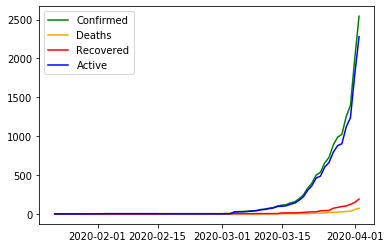

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(india.Date, india.Confirmed, color = 'g', label='Confirmed')
plt.plot(india.Date, india.Deaths, color = 'orange', label='Deaths')
plt.plot(india.Date, india.Recovered, color = 'red', label='Recovered')
plt.plot(india.Date, india.Active, color = 'blue', label='Active')
plt.legend()
plt.show()

In [9]:
china = china.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

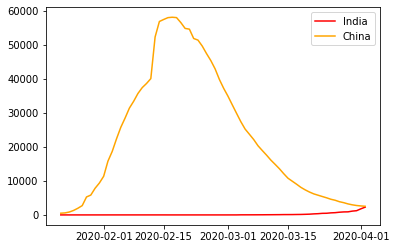

In [10]:
plt.plot(india.Date, india.Active, 'r', label='India')
plt.plot(china.Date, china.Active, 'orange', label='China')
plt.legend()
plt.show()

In [11]:
import pandas as pd 
from shapely.geometry import Point 
import geopandas as gpd
from mpl_toolkits.basemap import Basemap

In [12]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [17]:
df1 = df.groupby(['Lat','Long'])['Confirmed'].max().reset_index()

In [16]:
# import geopandas 

# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

# world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


/home/deeksha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


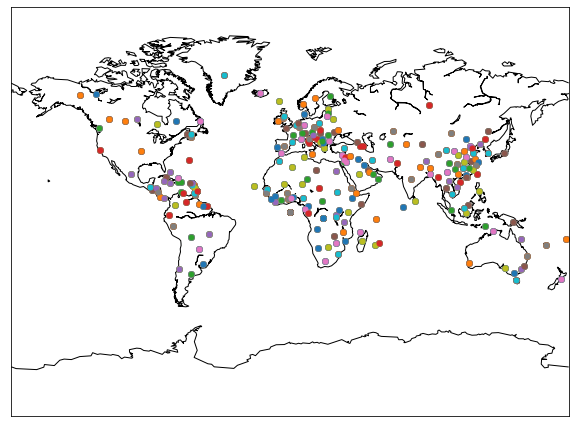

In [21]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(10,10))
m = Basemap(projection='mill')
m.drawcoastlines()
# m.etopo()

def plot_map(lat, lon):
    xpt, ypt = m(lon, lat)
    m.plot(xpt, ypt, 'o', markersize=5)
    return

df.apply(lambda x: plot_map(x['Lat'],x['Long']),axis=1)
plt.show()
# world.plot()
# geometry = [Point(xy) for xy in zip(df['Long'], df['Lat'])]
# crs = {'init': 'epsg:4326'}
# gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
# gdf.head()

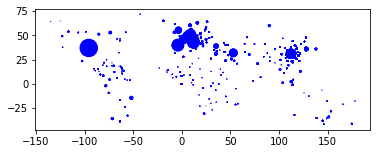

In [18]:
# gdf.plot(marker='.', color='b', markersize=0.005*df['Confirmed'])